In [17]:
# Import the sys module, which provides access to system-specific parameters and functions
import sys

# Use pip to install the required Python packages in the current environment
!{sys.executable} -m pip install pandas numpy matplotlib kagglehub



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Imports all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os


In [19]:
# Use kagglehub to download the dataset from Kaggle
path = kagglehub.dataset_download("ardayavuzkeskin/top-ai-tools-popularity-and-valuation")


In [ ]:
# Combine the downloaded dataset folder path with the CSV filename to get the full file path
csv_path = os.path.join(path, "AI_Tools_List.csv")

# Read the CSV file into a pandas DataFrame called 'df'
df = pd.read_csv(csv_path, encoding="latin1")

# Preview the first 5 rows of the DataFrame to check the data and column names
df.head()


,AI Name,Developer/Company,Release Year,AI Type,Main Use Case,Popularity Score (1-10),Estimated_Valuation_Billion_USD
0,ChatGPT,OpenAI,2022,Chatbot,Text Generation,10.0,85.0
1,Claude,Anthropic,2023,Chatbot,Text Generation,8.5,4.5
2,Gemini,Google DeepMind,2023,Chatbot,Text Generation,8.5,15.0
3,Copilot,Microsoft,2023,Coding Assistant,Code Completion,8.0,NaN
4,Midjourney,Midjourney,2022,Image Generator,Art Generation,9.0,1.5


In [21]:
# Get a list of all column names in the DataFrame 'df'
df.columns.tolist()


['AI Name',
 'Developer/Company',
 'Release Year',
 'AI Type',
 'Main Use Case',
 'Popularity Score (1-10)',
 'Estimated_Valuation_Billion_USD']

In [22]:
# Rename selected columns for easier reference in analysis:
# - "AI Name" → "tool"
# - "Estimated_Valuation_Billion_USD" → "valuation_billion"
# - "Popularity Score (1-10)" → "popularity"
df = df.rename(columns={
    "AI Name":"tool", 
    "Estimated_Valuation_Billion_USD":"valuation_billion", 
    "Popularity Score (1-10)":"popularity"
})

# Keep only the three columns we need for analysis: tool name, valuation, and popularity
df = df[["tool","valuation_billion","popularity"]]

# Preview the first 5 rows to confirm the renaming and column selection worked correctly
df.head()


,tool,valuation_billion,popularity
0,ChatGPT,85.0,10.0
1,Claude,4.5,8.5
2,Gemini,15.0,8.5
3,Copilot,NaN,8.0
4,Midjourney,1.5,9.0


In [23]:
# Remove the row with index 2 from the DataFrame
df = df.drop(2)

# Reset the DataFrame index after dropping the row
df.reset_index(drop=True, inplace=True)


In [25]:
# Remove any rows where 'valuation_billion' or 'popularity' is missing (NaN)
clean = df.dropna(subset=["valuation_billion","popularity"])

# This removes invalid or zero values that could skew analysis
clean = clean[(clean["valuation_billion"] > 0) & (clean["popularity"] > 0)]

# Display the shape of the cleaned DataFrame (number of rows and columns)
clean.shape


(38, 3)

In [26]:
# Generate statistics for the cleaned DataFrame
clean.describe()


,valuation_billion,popularity
count,38.000000,38.000000
mean,6.186842,6.881579
std,19.172431,0.940344
min,0.100000,5.500000
25%,0.100000,6.500000
50%,0.450000,6.500000
75%,1.462500,7.375000
max,85.000000,10.000000


In [27]:
# Calculate the Pearson correlation between 'valuation_billion' and 'popularity'
correlation = clean["valuation_billion"].corr(clean["popularity"], method="pearson")

# Print the correlation value rounded to 3 decimal places
print("Pearson correlation between valuation and popularity:", round(correlation,3))


Pearson correlation between valuation and popularity: 0.63


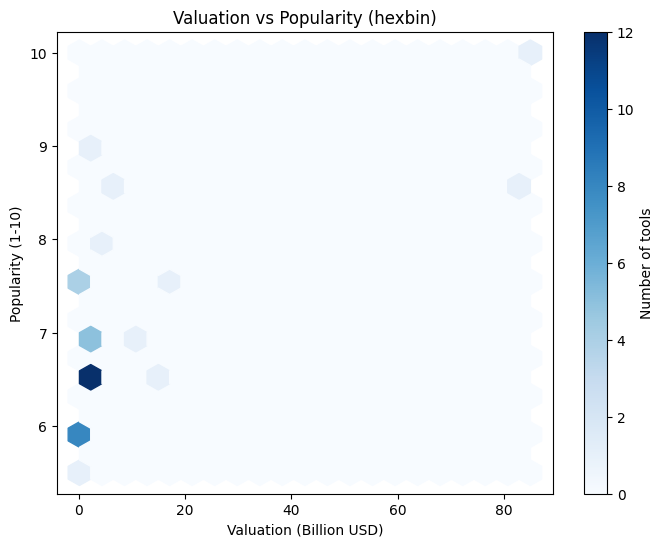

In [28]:
# Create a hexbin plot of valuation vs. popularity
# Hexbin plots show the density of points in each hexagon, useful for overlapping data
plt.figure(figsize=(8,6))
plt.hexbin(clean["valuation_billion"], clean["popularity"], gridsize=20, cmap='Blues')
plt.colorbar(label='Number of tools')
plt.xlabel("Valuation (Billion USD)")
plt.ylabel("Popularity (1-10)")
plt.title("Valuation vs Popularity (hexbin)")
plt.show()
